In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('wordnet')



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
train_dataset = pd.read_csv("train.csv")


In [3]:
train_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [5]:
train_dataset.shape

(20800, 5)

In [6]:
train_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
train_dataset = train_dataset.dropna(subset= "text")

In [8]:
train_dataset.isnull().sum()

id           0
title      558
author    1918
text         0
label        0
dtype: int64

In [9]:
X = train_dataset["text"]
y= train_dataset["label"]

In [10]:
print(train_dataset['label'].value_counts())


label
0    10387
1    10374
Name: count, dtype: int64


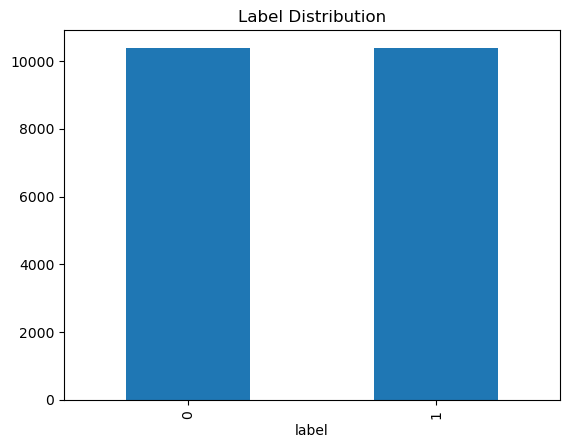

In [11]:

train_dataset['label'].value_counts().plot(kind='bar')
plt.title('Label Distribution')
plt.show()


count     20761.000000
mean       4552.715380
std        5130.563491
min           1.000000
25%        1628.000000
50%        3361.000000
75%        6275.000000
max      142961.000000
Name: text_length, dtype: float64


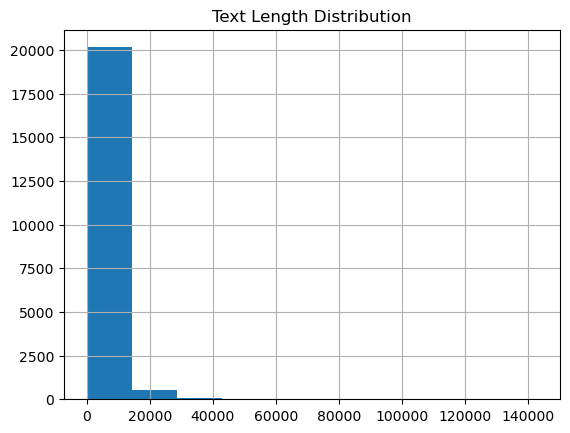

In [12]:
# Calculate the text length and store it in a new column using .loc
train_dataset.loc[:, 'text_length'] = train_dataset['text'].apply(len)

# Display summary statistics of the text length
print(train_dataset['text_length'].describe())

# Plot the distribution of text lengths
train_dataset['text_length'].hist()
plt.title('Text Length Distribution')
plt.show()


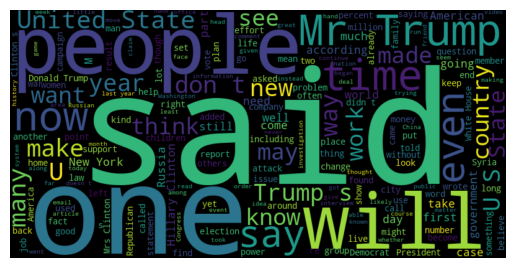

In [13]:
# Create a word cloud to visualize frequent words
from wordcloud import WordCloud

text = ' '.join(train_dataset['text'])
wordcloud = WordCloud(width=800, height=400, max_words=200).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
import re


In [15]:

def clean_text(text):

    text = re.sub(r"http\S+", "", text)

    text = re.sub(r"[^a-zA-Z\s]", "", text)

    text = text.lower()
    return text



In [16]:
train_dataset["cleaned_text"] = train_dataset["text"].apply(clean_text)

In [17]:
print(clean_text("Check out this link: http://example.com! This is some text."))


check out this link  this is some text


In [18]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [19]:
lemmatizer = WordNetLemmatizer()

train_dataset["Lemmatizer"] = train_dataset["cleaned_text"].apply( lambda x: " ".join([lemmatizer.lemmatize(word) for word in str(x).split()]) if isinstance(x, str) else x)

In [20]:
X = train_dataset["Lemmatizer"]
y = train_dataset["label"]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english', max_features=10000, ngram_range=(1, 2))
tfidf_X_train = tfidf.fit_transform(X_train)

tfidf_X_test = tfidf.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report



In [24]:
# Initialize the model (Logistic Regression)
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(tfidf_X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(tfidf_X_test)



In [25]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3138
           1       0.93      0.95      0.94      3091

    accuracy                           0.94      6229
   macro avg       0.94      0.94      0.94      6229
weighted avg       0.94      0.94      0.94      6229



In [26]:
from sklearn.metrics import accuracy_score


In [27]:
accuracy_score(y_test, y_pred)

0.9426874297640071

In [ ]:
#For test File

In [92]:
# Load the test dataset (to make predictions)
test_dataset = pd.read_csv("test.csv")

test_dataset.shape
# Check for missing values
print(test_dataset.isnull().sum())

# Correctly fill missing values in the 'text' column
test_dataset['text'].fillna('', inplace=True)


# Apply text cleaning and lemmatization to the test dataset
test_dataset["cleaned_text"] = test_dataset["text"].apply(clean_text)
test_dataset["Lemmatizer"] = test_dataset["cleaned_text"].apply(
    lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]) if isinstance(x, str) else x
)

# Prepare the features (X_test_final) for predictions
X_test_final = test_dataset["Lemmatizer"]

# Transform the test data using the already fitted TF-IDF vectorizer
X_test_final_tfidf = tfidf.transform(X_test_final)

# Make predictions on the test data
y_pred_test_final = model.predict(X_test_final_tfidf)

# Save the predictions to a new CSV (including id, title, and author)
predictions_df = pd.DataFrame({
    'id': test_dataset['id'],
    'label': y_pred_test_final
})

# Save the predictions to a CSV file
predictions_df.to_csv("submission.csv", index=False)

print("Predictions saved to 'submission.csv'.")

id          0
title     122
author    503
text        7
dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_7284\2266783571.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_dataset['text'].fillna('', inplace=True)


Predictions saved to 'submission.csv'.


(5200, 2)
